# API application

Web Crawl: the nutrition data from the [USDA Food Composition Databases](https://ndb.nal.usda.gov/ndb/search/list).

The USDA Food Composition Databases have a [documented](https://ndb.nal.usda.gov/ndb/doc/index) web API that returns data in JSON format . 


In [1]:
key="kd5O3qthVqEjVNd5yJ9jBKR4vVtrMDx9cpzE06OM"
import requests
import requests_cache
import pandas as pd
import numpy as np
import json
import re
from matplotlib import pyplot as plt

requests_cache.install_cache('my_cache') #set it once and it works if you don't close the file

In [4]:
#https://api.nal.usda.gov/ndb/search/?format=json&q=butter&sort=n&max=25&
#offset=0&api_key=DEMO_KEY
def ndb_search(key,searchitem,ds,sort):
    """
    This takes all of the necessary parameters to form a query 
    to search for something in USDA Food Composition Databases
    
    Input: key (data.gov API key, string), 
           searchitem (list of things we want to search), 
           ds (Data source. Must be either 'Branded Food Products' or 'Standard Reference')
           sort (Sort the results by food name (n) or by search relevance (r))
    Output: list object
    """
    urlbase = "https://api.nal.usda.gov/ndb/search/?"
    params = {"format": "json"}
    searchitems = searchitem.replace(' ','+')
    params.update({"q":searchitems,"sort":sort})
    params.update({"api_key":key})
    #if return_request:
    #    return requests.get(urlbase,params=params)
    
    url = urlbase + "&".join("{}={}".format(a,b) for a,b in params.items())
    requestget = requests.get(url)
    resultjson = requestget.json()
        
    try:
        resultdic = resultjson['list']['item']
        return resultdic

    except :
        resultdic = []
        return resultdic

    
ndb_search(key,'quail eggs',"Branded Food Products", 'n')

[{u'ds': u'BL',
  u'group': u'Branded Food Products Database',
  u'name': u'BUDDHA, QUAIL EGGS IN BRINE, UPC: 761934535098',
  u'ndbno': u'45099560',
  u'offset': 0},
 {u'ds': u'BL',
  u'group': u'Branded Food Products Database',
  u'name': u'CHAOKOH, QUAIL EGG IN BRINE, UPC: 044738074186',
  u'ndbno': u'45094707',
  u'offset': 1},
 {u'ds': u'BL',
  u'group': u'Branded Food Products Database',
  u'name': u"D'ARTAGNAN, QUAIL EGGS, UPC: 736622102630",
  u'ndbno': u'45178254',
  u'offset': 2},
 {u'ds': u'SR',
  u'group': u'Dairy and Egg Products',
  u'name': u'Egg, quail, whole, fresh, raw',
  u'ndbno': u'01140',
  u'offset': 3},
 {u'ds': u'BL',
  u'group': u'Branded Food Products Database',
  u'name': u'GRAN SABANA, QUAIL EGGS, UPC: 819140010103',
  u'ndbno': u'45169279',
  u'offset': 4},
 {u'ds': u'BL',
  u'group': u'Branded Food Products Database',
  u'name': u'L&W, QUAIL EGGS, UPC: 024072000256',
  u'ndbno': u'45094890',
  u'offset': 5}]

### get NDB number for selected fruit and vegetables in a csv file

In [36]:
fooddata = pd.read_csv('/Users/thalia/study/UCD/2017winter/141B/assignments/assignment4/fresh.csv')
foodlist = fooddata['food'].str.replace('_',' ')
fooddata['food'] = foodlist
fooddata['index'] = range(len(fooddata))
foodlist = pd.concat([foodlist,fooddata[['type','form']]],axis=1)
fooddata

,form,price_per_lb,yield,lb_per_cup,price_per_cup,food,type,index
0,Fresh1,0.333412,0.520000,0.330693,0.212033,watermelon,fruit,0
1,Fresh1,0.535874,0.510000,0.374786,0.393800,cantaloupe,fruit,1
2,Fresh1,1.377962,0.740000,0.407855,0.759471,tangerines,fruit,2
3,Fresh1,2.358808,0.940000,0.319670,0.802171,strawberries,fruit,3
4,Fresh1,1.827416,0.940000,0.363763,0.707176,plums,fruit,4
5,Fresh1,1.035173,0.730000,0.407855,0.578357,oranges,fruit,5
6,Fresh1,6.975811,0.960000,0.319670,2.322874,raspberries,fruit,6
7,Fresh1,2.173590,0.560000,0.341717,1.326342,pomegranate,fruit,7
8,Fresh1,0.627662,0.510000,0.363763,0.447686,pineapple,fruit,8
9,Fresh1,3.040072,0.930000,0.363763,1.189102,apricots,fruit,9


In [20]:
def ndb_searchno(key,foodlist, ds, descriptioninname, sort):
    """
    This takes all of the necessary parameters to form a query 
    to search for something in USDA Food Composition Databases
    
    Input: key (data.gov API key, string), 
           foodlist (list of food and their info), 
           descriptioninname (other description we need to use)
           ds (Data source. Must be either 'Branded Food Products' or 'Standard Reference')
           sort (Sort the results by food name (n) or by search relevance (r))
    Output: dataframe
    """
    food = foodlist['food']
    foodtype = foodlist['type']
    foodndb = ndb_search(key,food + ' '+ descriptioninname,ds, sort)
    foodndbdataframe = pd.DataFrame(foodndb) 
    alternative = {u'ds': u'BL',
                   u'group': u' ',
                   u'name': food,
                   u'ndbno': u'',
                   u'offset': 0,
                   u'food': food,
                   u'type': foodtype,
                   u'form': foodlist['form']}
    alternative = pd.DataFrame(alternative, index = ['0'])
    try:
        row = foodndbdataframe['group'].str.contains('Fruits|Vegetables')==True 
        try:
            unbrandedfood =  foodndbdataframe.loc[row]
            unbrandedfood['food']= food
            unbrandedfood['type']= foodlist['type']
            unbrandedfood['form']= foodlist['form']
            n,_ = unbrandedfood.shape
            unbrandedfood.index = range(n)
            return unbrandedfood
        except:
            return alternative
    except:
        return alternative

In [21]:
def plural(name):
    """ try to get all form of words
    input: the word
    output: word itself and some possible plural forms
    """
    pln = name+'s'
    pln2 = name[:-1]+'es'
    return [pln,pln2]

## The description of search of unique ndbno:

### prepare work:
1. delete items whose name includes 'juice', which is obviously not right
2. delete items whose group doesn't fit the type of it

### principle:
1. if we have only one result, choose it (of course we need to check it)
2. if we have one item which has a name with only the food name and 'raw', choose it
3. if we have more than one choices still, find the smallest ndbno, because we can see that they are basicallly the one with largest range.
4. if there is no choice ,we just return a blank ndbno cell

### other situation:

cabbage and cucumber have two different form, we use also the form to include the info to choose the best ndbno, by extract the regular expression and add it into the name to search for the whole description.

In [22]:
def unique_no(dat):
    """ try to figure out the only ndb of some item
    input:
        dat : dataframe from searchresult
        
    output: the single row of dataframe , which we think it to the best one that fit the item
    """
    datcopy = dat.copy()
    n,_=dat.shape
    if n==1:
        return dat
    name = dat['name']
    name = [n.lower() for n in name]
    name = [n.replace(',','') for n in name]
    name = [n.encode("ascii") for n in name]
    dat['name'] = name
    food = dat.ix[0,'food']
    foodpln = plural(food)
    foodpln.append(food)
    foodwords = food.split(' ')
    foodwords.append('raw')
    nname = [dat['name'].str.contains(i[:-1])|dat['name'].str.contains(i[:-2])|dat['name'].str.contains(i[:-3]) for i in foodwords]
    index = [item.index[item] for item in nname]
    indexfinal = reduce((lambda x,y: x & y),index)
    dat = dat.ix[indexfinal]
    n,_ = dat.shape
    dat.index = range(n)
    if len(dat)==0:
        alternative = {u'ds': u'BL',
                   u'group': u' ',
                   u'name': food,
                   u'ndbno': u'',
                   u'offset': 0,
                   u'food': food,
                   u'type': datcopy['type'],
                   u'form': datcopy['form']}
        alternative = pd.DataFrame(alternative, index = ['0'])
        return alternative 
    name = dat['name']
    dattype = dat.ix[0,'type']
    n,_ = dat.shape 
    if n ==1:
        return dat
    else:
        bestname = [x+' '+"raw" for x in foodpln]
        length = [len(n) for n in name]
        simplestname = name[length.index(min(length))]
        index = [simplestname==name_best for name_best in bestname]
        if True in index:
            finalname = simplestname
        try:
            return dat.ix[name.index(finalname)]
        except:
            dattype = dat.ix[0,'type']
            for i in xrange(len(name)):
                if 'juice' in name[i]: 
                        dat = dat.drop(i)
                        n,_ = dat.shape
                        dat.index = range(n)
            form = dat.ix[0,'form']
            if form == "Fresh1":
                finalnum = min(dat['ndbno'])
                return dat.ix[dat['ndbno']==finalnum]
            else:
                splittext = re.findall(r'Fresh(.+?)1',form)[0].split(' ')[-2:]
                newinfo = splittext[0]+' '+splittext[1]
                index2 = [newinfo in dat['name'][i] for i in xrange(len(dat['name']))]
                if True in index2:
                    finalindex2 = index2.index(True)
                    return dat.ix[finalindex2]
                else:
                    finalnum = min(dat['ndbno'])
                    return dat.ix[dat['ndbno']==finalnum]
    

In [23]:
firstresult = [ndb_searchno(key,foodlist.loc[i],'Standard Reference','raw', 'n') for i in xrange(len(foodlist))]

/Users/thalia/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/thalia/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/thalia/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/sta

In [83]:
secondresult = [unique_no(item) for item in firstresult] 
def changetype(item):
    '''
    try to change ojbect into dataframe
    '''
    try:
        if item.dtype == object:
            return pd.DataFrame(item).T
    except:
        return item
thirdresult = [changetype(item) for item in secondresult]
finalresult = pd.concat(thirdresult,ignore_index = True)
finalndb = finalresult[['food','ndbno']]
finalndb['index']=range(len(finalndb))
finaldata = pd.merge(fooddata,finalndb,on = 'index',how = 'inner')
del finaldata['index']
del finaldata['food_y']
finaldata

/Users/thalia/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,form,price_per_lb,yield,lb_per_cup,price_per_cup,food_x,type,ndbno
0,Fresh1,0.333412,0.520000,0.330693,0.212033,watermelon,fruit,09326
1,Fresh1,0.535874,0.510000,0.374786,0.393800,cantaloupe,fruit,09181
2,Fresh1,1.377962,0.740000,0.407855,0.759471,tangerines,fruit,09218
3,Fresh1,2.358808,0.940000,0.319670,0.802171,strawberries,fruit,09140
4,Fresh1,1.827416,0.940000,0.363763,0.707176,plums,fruit,09061
5,Fresh1,1.035173,0.730000,0.407855,0.578357,oranges,fruit,09200
6,Fresh1,6.975811,0.960000,0.319670,2.322874,raspberries,fruit,09302
7,Fresh1,2.173590,0.560000,0.341717,1.326342,pomegranate,fruit,09286
8,Fresh1,0.627662,0.510000,0.363763,0.447686,pineapple,fruit,09266
9,Fresh1,3.040072,0.930000,0.363763,1.189102,apricots,fruit,09021


### Get NDB nutrition reports from ndb number 

In [16]:
#https://api.nal.usda.gov/ndb/reports/V2?
#ndbno=01009&ndbno=01009&ndbno=45202763&ndbno=35193&type=b&format=json&api_key=DEMO_KEY
def ndb_report(key,ndbno):
    """
    to get the nutrition report for certain ndbno
    
    Input: key (data.gov API key, string), 
           ndbno the ndbno to search for
    Output: list object
    """
    urlbase = "https://api.nal.usda.gov/ndb/V2/reports?"
    params = {"format": "json"}
    params.update({"api_key":key})
    params.update({'ndbno':ndbno})
    
    url = urlbase + "&".join("{}={}".format(a,b) for a,b in params.items())
    requestget = requests.get(url)
    resultjson = requestget.json()
        
    try:
        resultdic = resultjson['foods'][0]['food']['nutrients']
        return resultdic

    except :
        resultdic = []
        return resultdic

In [81]:
ndb_report(key,"09279")[0]

{u'group': u'Proximates',
 u'measures': [{u'eqv': 165.0,
   u'eunit': u'g',
   u'label': u'cup, sliced',
   u'qty': 1.0,
   u'value': u'143.93'},
  {u'eqv': 66.0,
   u'eunit': u'g',
   u'label': u'fruit (2-1/8" dia)',
   u'qty': 1.0,
   u'value': u'57.57'},
  {u'eqv': 151.0,
   u'eunit': u'g',
   u'label': u'NLEA serving',
   u'qty': 1.0,
   u'value': u'131.72'}],
 u'name': u'Water',
 u'nutrient_id': u'255',
 u'unit': u'g',
 u'value': u'87.23'}

### Which foods provide the best combination of price, yield, and nutrition? 

In [57]:
for i in finaldata.index:
    ndb = finaldata.ix[i,'ndbno']
    if ndb !='':
        energy=ndb_report(key,ndb)[1]['value']
        finaldata.ix[i,'nutrition']=energy

In [70]:
finaldata2 = finaldata[finaldata.ix[:,'ndbno']!='']
n,_=finaldata2.shape
finaldata2.index=range(n)
score = [pd.to_numeric(finaldata2.ix[i,'nutrition']).astype(float)/finaldata2.ix[i,'price_per_lb'].astype(float) * finaldata2.ix[i,'yield'].astype(float) for i in range(len(finaldata2))]
finaldata2['score']=score
finaldata2

/Users/thalia/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,form,price_per_lb,yield,lb_per_cup,price_per_cup,food_x,type,food_y,ndbno,nutrition,score
0,Fresh1,0.333412,0.520000,0.330693,0.212033,watermelon,fruit,watermelon,09326,30,46.788953
1,Fresh1,0.535874,0.510000,0.374786,0.393800,cantaloupe,fruit,cantaloupe,09181,34,32.358366
2,Fresh1,1.377962,0.740000,0.407855,0.759471,tangerines,fruit,tangerines,09218,53,28.462326
3,Fresh1,2.358808,0.940000,0.319670,0.802171,strawberries,fruit,strawberries,09140,69,27.496934
4,Fresh1,1.827416,0.940000,0.363763,0.707176,plums,fruit,plums,09061,62,31.892027
5,Fresh1,1.035173,0.730000,0.407855,0.578357,oranges,fruit,oranges,09200,47,33.144227
6,Fresh1,6.975811,0.960000,0.319670,2.322874,raspberries,fruit,raspberries,09302,52,7.156157
7,Fresh1,2.173590,0.560000,0.341717,1.326342,pomegranate,fruit,pomegranate,09286,83,21.383974
8,Fresh1,0.627662,0.510000,0.363763,0.447686,pineapple,fruit,pineapple,09266,50,40.626965
9,Fresh1,3.040072,0.930000,0.363763,1.189102,apricots,fruit,apricots,09021,48,14.683863


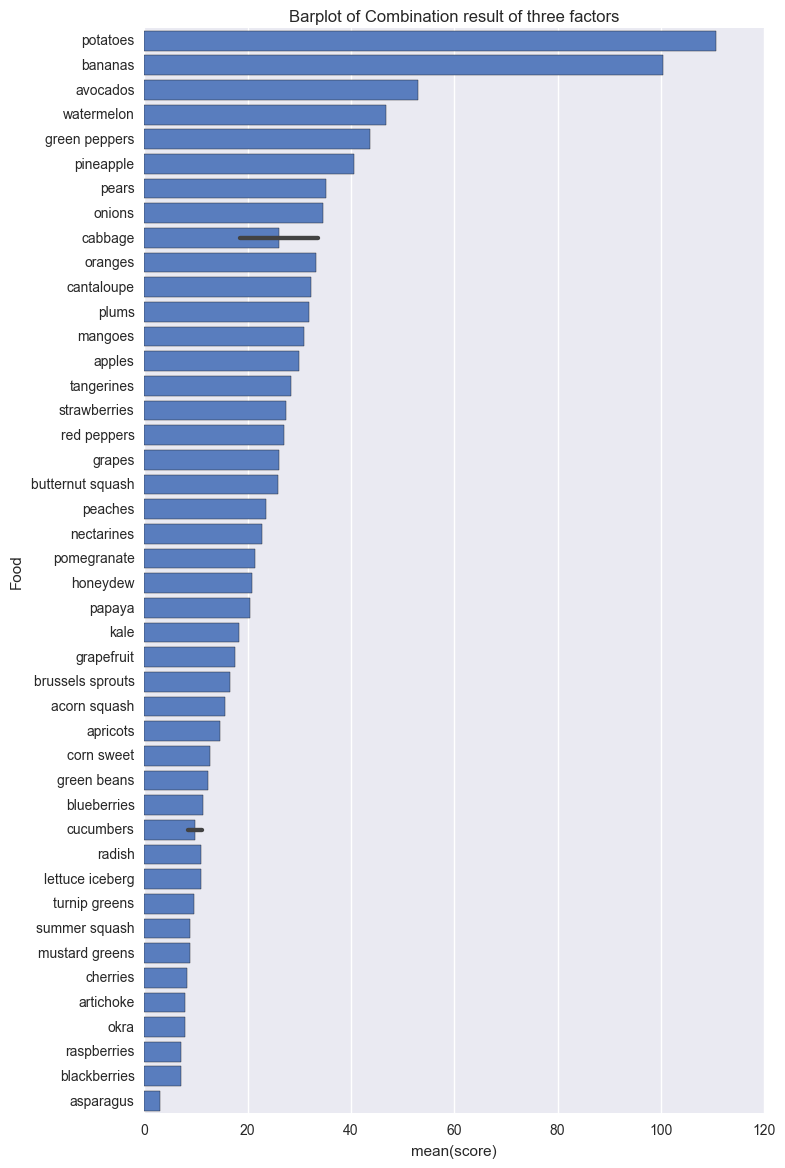

In [76]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.subplots(figsize=(8, 14))
finaldata3 = finaldata2.sort_values("score", ascending=False)
sns.set_color_codes("muted")
sns.barplot(x="score", y="food_x", data=finaldata3, label="comparison",color='b')
plt.title('Barplot of Combination result of three factors')
plt.ylabel('Food')
plt.show()

From the graph, we can see that potatoes is the best one in these items, since it has the highest score from the combination of price, yield and nutrition(here we use energy to replace).